In [1]:
# Model Evaluation and Refinement 
# importing the requered libraries 
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [2]:
# reaing the csv file and storing in the df 
df = pd.read_csv('module_5_auto.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,symboling,normalized-losses,make,aspiration,num-of-doors,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,0,0,3,122,alfa-romero,std,two,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,1,1,3,122,alfa-romero,std,two,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,2,2,1,122,alfa-romero,std,two,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,3,3,2,164,audi,std,four,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,4,4,2,164,audi,std,four,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# converting dataframe to csv 
df.to_csv('module_5_auto.csv')

In [5]:
# first using the numerical data only 
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,symboling,normalized-losses,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,0,0,0,3,122,88.6,0.811148,0.890278,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,1,1,1,3,122,88.6,0.811148,0.890278,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,2,2,2,1,122,94.5,0.822681,0.909722,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,3,3,3,2,164,99.8,0.848630,0.919444,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,4,4,4,2,164,99.4,0.848630,0.922222,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# libraries for plotting 
from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
# function for plotting 
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [9]:
# splitting the data into traning and testing data set 
# placing the target data price in a separate dataframe y_data:
y_data = df['price']

In [10]:
x_data = df.drop('price', axis=1)

In [11]:
# now splitting data into traning data and testing data 
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [12]:
# Use the function "train_test_split" to split up the dataset such that 40% of the data 
# samples will be utilized for testing. Set the parameter "random_state" equal to zero. 
# The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size= 0.4, random_state=0)
print("Number of test samples: ", x_test1.shape[0])
print("Number of train samples: ", x_train1.shape[0])

Number of test samples:  81
Number of train samples:  120


In [13]:
# importing  LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression 

In [14]:
# creating a Linear Regression object
lre = LinearRegression()


In [15]:
# We fit the model using the feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [16]:
# Let's calculate the R^2 on the test data: 
lre.score(x_test[['horsepower']], y_test)


# We can see the R^2 is much smaller using the test data compared to the training data.


0.36358755750788263

In [17]:
# calculating r^2 on test data 
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [18]:
# calculating R^2 on the test data using 40% of the dataset for testing. 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)


# x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

# This line of code is using the train_test_split() function from scikit-learn to split the dataset into 
# training and testing sets. It takes the input features x_data and the target variable y_data as arguments. 
# The test_size=0.4 parameter specifies that 40% of the data should be allocated for testing, while 60% will 
# be used for training. The random_state=0 parameter sets a specific random seed value to ensure that the 
# split is reproducible.


# lre.fit(x_train1[['horsepower']], y_train1)

# This line of code is fitting a linear regression model (lre) to the training data. It uses the 
# fit() method of the linear regression object and provides x_train1[['horsepower']] as the input 
# features and y_train1 as the target variable. The double brackets [['horsepower']] are used to 
# select only the 'horsepower' column as a DataFrame for training.


# lre.score(x_test1[['horsepower']], y_test1)

# This line of code is calculating the R-squared score of the linear regression model on the testing data. 
# The score() method of the linear regression object (lre) is used, and it takes x_test1[['horsepower']] as 
# the input features and y_test1 as the target variable. The R-squared score is a measure of how well the 
# model fits the testing data, with values closer to 1 indicating a better fit.



0.7139364665406973

In [19]:
# Cross-Validation Score


# Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. 
# Let's go over several methods that you can use for cross-validation.

# importing model_selection from the module cross_val_score 
from sklearn.model_selection import cross_val_score

In [20]:
# We input the object, the feature ("horsepower"), and the target data (y_data). The 
# parameter 'cv' determines the number of folds. In this case, it is 4.
Rcorss = cross_val_score(lre, x_data[['horsepower']], y_data, cv= 4)

In [21]:
# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcorss 

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
# We can calculate the average and standard deviation of our estimate:
print("The mean of the folds are", Rcorss.mean(), "and the standard deviation is ", Rcorss.std())

The mean of the folds are 0.522009915042119 and the standard deviation is  0.2911839444756029


In [23]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1* cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [24]:
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429

In [25]:
# You can also use the function 'cross_val_predict' to predict the output. The function splits 
# up the data into the specified number of folds, with one fold for testing and the other folds 
# are used for training. First, import the function:
from sklearn.model_selection import cross_val_predict 

In [26]:
# We input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines 
# the number of folds. In this case, it is 4. We can produce an output:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [27]:
# Overfitting, Underfitting and Model Selection 
# It turns out that the test data, sometimes referred to as the "out of sample data", is a much 
# better measure of how well your model performs in the real world. One reason for this is overfitting.
# Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression 
# and Polynomial Regression so we will explore overfitting in that context.
# Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 
# 'engine-size' and 'highway-mpg' as features.

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [28]:
# making prediction using traing data 
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [29]:
# making prediction using testing data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

C:\Users\PC\AppData\Local\Temp\ipykernel_16240\2467699730.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\PC\AppData\Local\Temp\ipykernel_16240\2467699730.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.dis

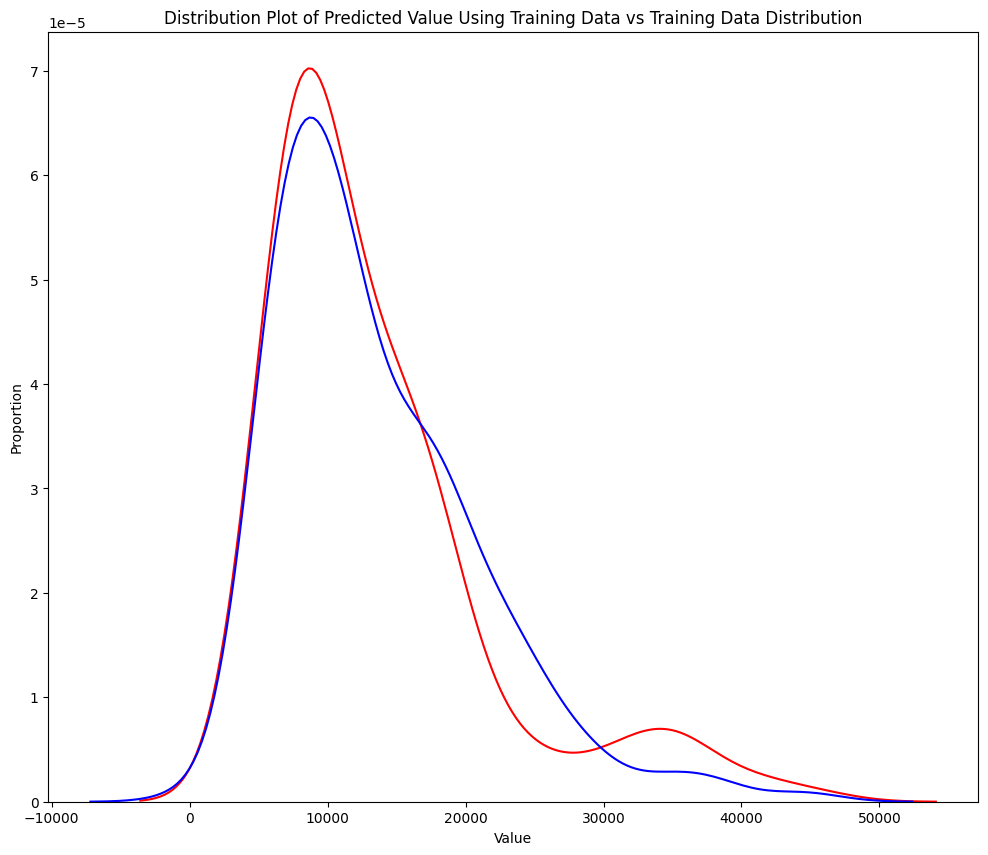

In [30]:
# examining  the distribution of the predicted values of the training data.
import matplotlib.pyplot as plt
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Value')
    plt.ylabel('Proportion')
    plt.show()

# Example usage
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", "Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution")


In [31]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

# So far, the model seems to be doing well in learning from the training dataset. But what happens when the model 
# encounters new data from the testing dataset? When the model generates new values from the test data, we see 
# the distribution of the predicted values is much different from the actual target values.


C:\Users\PC\AppData\Local\Temp\ipykernel_16240\971653907.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\PC\AppData\Local\Temp\ipykernel_16240\971653907.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distp

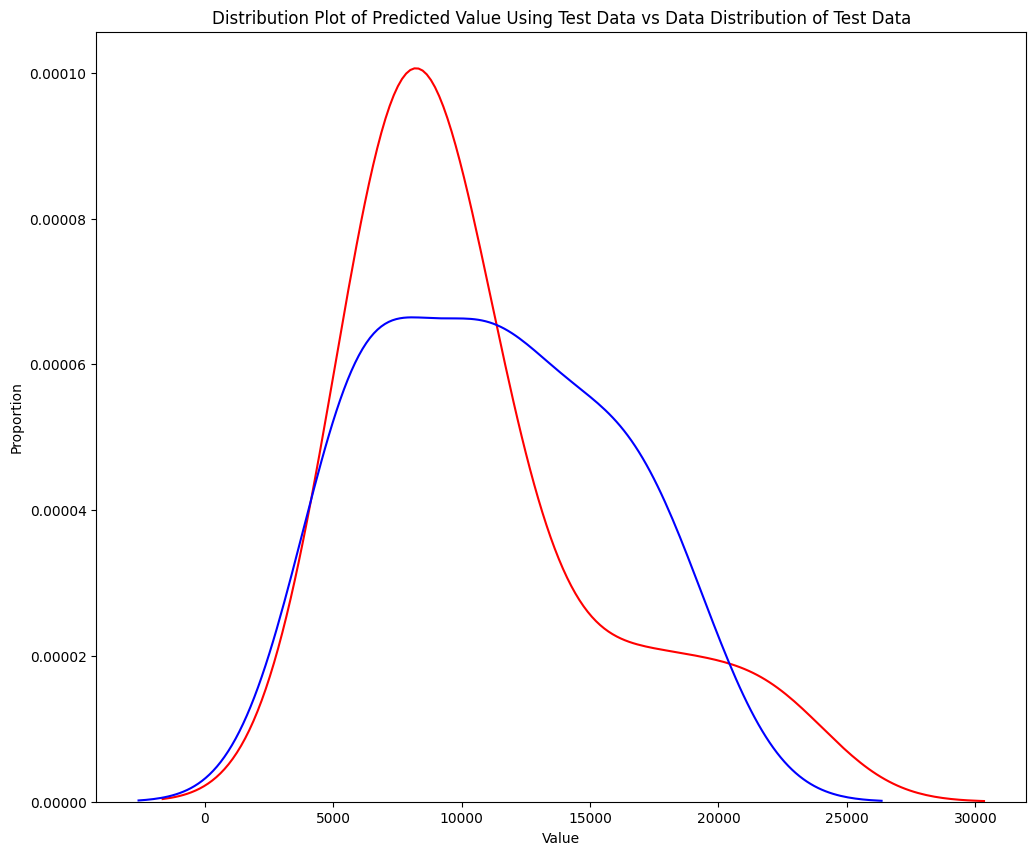

In [32]:
# examining  the distribution of the predicted values of the testing data.
import matplotlib.pyplot as plt
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Value')
    plt.ylabel('Proportion')
    plt.show()

# Example usage
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", "Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data")


In [33]:
# Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

# Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much 
# better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This 
# is where the shape of the distribution is extremely different. 

In [34]:
# Let's see if polynomial regression also exhibits a drop in the prediction accuracy 
# when analysing the test dataset.

from sklearn.preprocessing import PolynomialFeatures

In [35]:
# Overfitting
# Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, 
# when testing your model using the test set, your model does not perform as well since it is 
# modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

# Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [36]:
# performing 5 degree polynomial transformation on the feature horsepower 
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
# create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [38]:
# We can see the output of our model using the method "predict." We assign the values to "yhat".
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [40]:
# Let's take the first five predicted values and compare it to the actual targets.
print("Predictid values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predictid values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457]
True values: [ 6295. 10698. 13860. 13499.]
